In [118]:
import numpy as np
import matplotlib.pyplot as plt
import openpyxl as xl
from lmfit import minimize, Parameters, report_fit

In [119]:
'''Import data and get the length of data'''
x = []
y = []
wb = xl.load_workbook('D:\getdata\my_rabi\my_rabi.xlsx')
sheet = wb['Sheet1']

for row in range(2, sheet.max_row + 1):
    x.append(sheet.cell(row,1).value)
for row in range(2, sheet.max_row + 1):
    y.append(sheet.cell(row,2).value)

x_data =np.array(x)
y_data =np.array(y)
n = len(x_data)
print(x_data)
print(y_data)

[0.04945055 0.06593407 0.08791209 0.10989011 0.12637363 0.14835165
 0.17032967 0.18681319 0.20879121 0.22527473 0.24725275 0.26923077
 0.28571429 0.30769231 0.32417582 0.34615385 0.37362637 0.38461538
 0.41208791 0.42857143 0.45054945 0.46703297 0.48901099 0.50549451
 0.53296703 0.54945055 0.56593407 0.58791209 0.60989011 0.62637363
 0.64835165 0.67032967 0.69230769 0.70879121 0.73076923 0.74725275
 0.76923077 0.78571429 0.80769231 0.83516484 0.85164835 0.86813187
 0.89010989 0.91208791 0.93406593 0.95054945 0.97252747 0.98901099
 1.01098901 1.02747253 1.04945055 1.07142857 1.08791209 1.10989011
 1.12087912 1.15384615 1.17032967 1.19230769 1.21978022 1.23076923
 1.25274725 1.26923077 1.28571429 1.31318681 1.32967033 1.34615385
 1.37362637 1.3956044  1.40659341 1.42857143 1.45054945 1.47802198
 1.49450549 1.51098901 1.52747253 1.55494505 1.57142857 1.59340659
 1.60989011 1.63186813 1.65384615 1.66483516 1.68681319 1.71428571
 1.73626374 1.74725275 1.76923077 1.7967033  1.80769231 1.8351

In [120]:
def g(x,a):
    g = a[3]/2+(a[0]/2)*np.exp(-a[1]*x)*np.cos(a[2]*x)
    return g

In [121]:
# x = np.linspace(0,2,100)
# y = g(x,[1,0.2,16，0.5])
# plt.plot(x,y)

In [122]:
def residual(params, x, data):
    v = params.valuesdict()
    a = [v['a1'], v['a2'], v['a3'], v['a4']]
    model = g(x,a)
    return (data-model)

params = Parameters()
params.add('a1', value=0.5)
params.add('a2', value=0.105)
params.add('a3', value=4*np.pi, min=4*np.pi, max=8*np.pi)
params.add('a4', value=0.85*2)

out = minimize(residual, params, args=(x_data, y_data))
report_fit(out)
fitted_params = []
for name, param in out.params.items():
    fitted_params.append(param.value)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 139
    # data points      = 98
    # variables        = 4
    chi-square         = 0.11697187
    reduced chi-square = 0.00124438
    Akaike info crit   = -651.617347
    Bayesian info crit = -641.277477
[[Variables]]
    a1:  0.24771098 +/- 0.02385582 (9.63%) (init = 0.5)
    a2:  0.20240370 +/- 0.08963393 (44.28%) (init = 0.105)
    a3:  19.2934271 +/- 0.04763988 (0.25%) (init = 12.56637)
    a4:  1.72249314 +/- 0.00717031 (0.42%) (init = 1.7)
[[Correlations]] (unreported correlations are < 0.100)
    C(a1, a2) = 0.855
    C(a2, a4) = 0.102


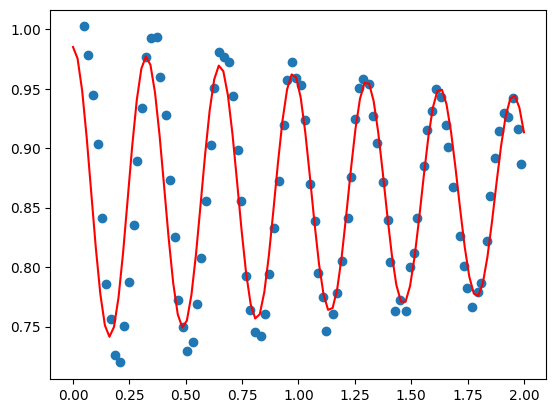

In [123]:
plt.scatter(x_data,y_data)
x = np.linspace(0,2,100)
y = g(x,fitted_params)
plt.plot(x,y,'r')
plt.show()